## Importing Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import json

## Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 70295 files belonging to 38 classes.


## Validation Image Proprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[251.5  249.5  250.5 ]
   [254.75 253.25 254.25]
   [254.25 252.75 253.75]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[253.25 251.5  252.5 ]
   [255.   253.5  254.5 ]
   [253.75 252.   253.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[253.25 251.5  252.5 ]
   [255.   253.5  254.5 ]
   [253.75 252.   253.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  ...

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   25

In [5]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
    cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
    cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [16]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

## Compiling and Training Phase

In [17]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

## Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

In [20]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 142s 257ms/step - loss: 4.0208 - accuracy: 0.0256
Validation accuracy: 0.025552013888955116


## Saving Model

In [23]:
cnn.save('trained_plant_disease_model.keras')

In [24]:
training_history.history

{'loss': [1.4598482847213745,
  0.5751343965530396,
  0.36499184370040894,
  0.26632142066955566,
  0.1986648440361023,
  0.15566207468509674,
  0.12949343025684357,
  0.108758345246315,
  0.09278945624828339,
  0.08285273611545563],
 'accuracy': [0.5694430470466614,
  0.8160750865936279,
  0.8820115327835083,
  0.9125257730484009,
  0.9347179532051086,
  0.9475069642066956,
  0.9565829634666443,
  0.9631268382072449,
  0.9690447449684143,
  0.9716053605079651],
 'val_loss': [0.6003255248069763,
  0.37702032923698425,
  0.3842453062534332,
  0.2742871046066284,
  0.2672214210033417,
  0.21952664852142334,
  0.27995309233665466,
  0.1954285353422165,
  0.17827372252941132,
  0.16561691462993622],
 'val_accuracy': [0.8150466680526733,
  0.8794673085212708,
  0.8745162487030029,
  0.9115069508552551,
  0.9160027503967285,
  0.9334737062454224,
  0.9144092798233032,
  0.9409856796264648,
  0.9458228945732117,
  0.9511154294013977]}

In [25]:
#Recording History in json
import json
with open('training_histtory.json','w') as f:
  json.dump(training_history.history,f)

In [26]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


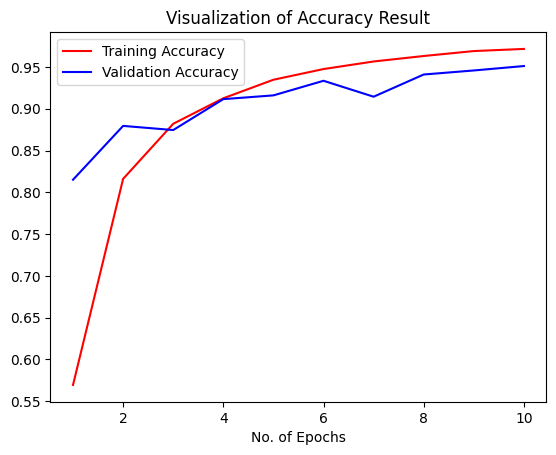

In [28]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


In [30]:
class_name = validation_set.class_names

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [32]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 301s 17ms/step


In [33]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [36]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.95      0.94       504
                                 Apple___Black_rot       0.99      0.96      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.95      0.96       440
                                   Apple___healthy       0.96      0.95      0.95       502
                               Blueberry___healthy       0.95      0.97      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.91      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.95      0.

## Confusion Matrix Visualization

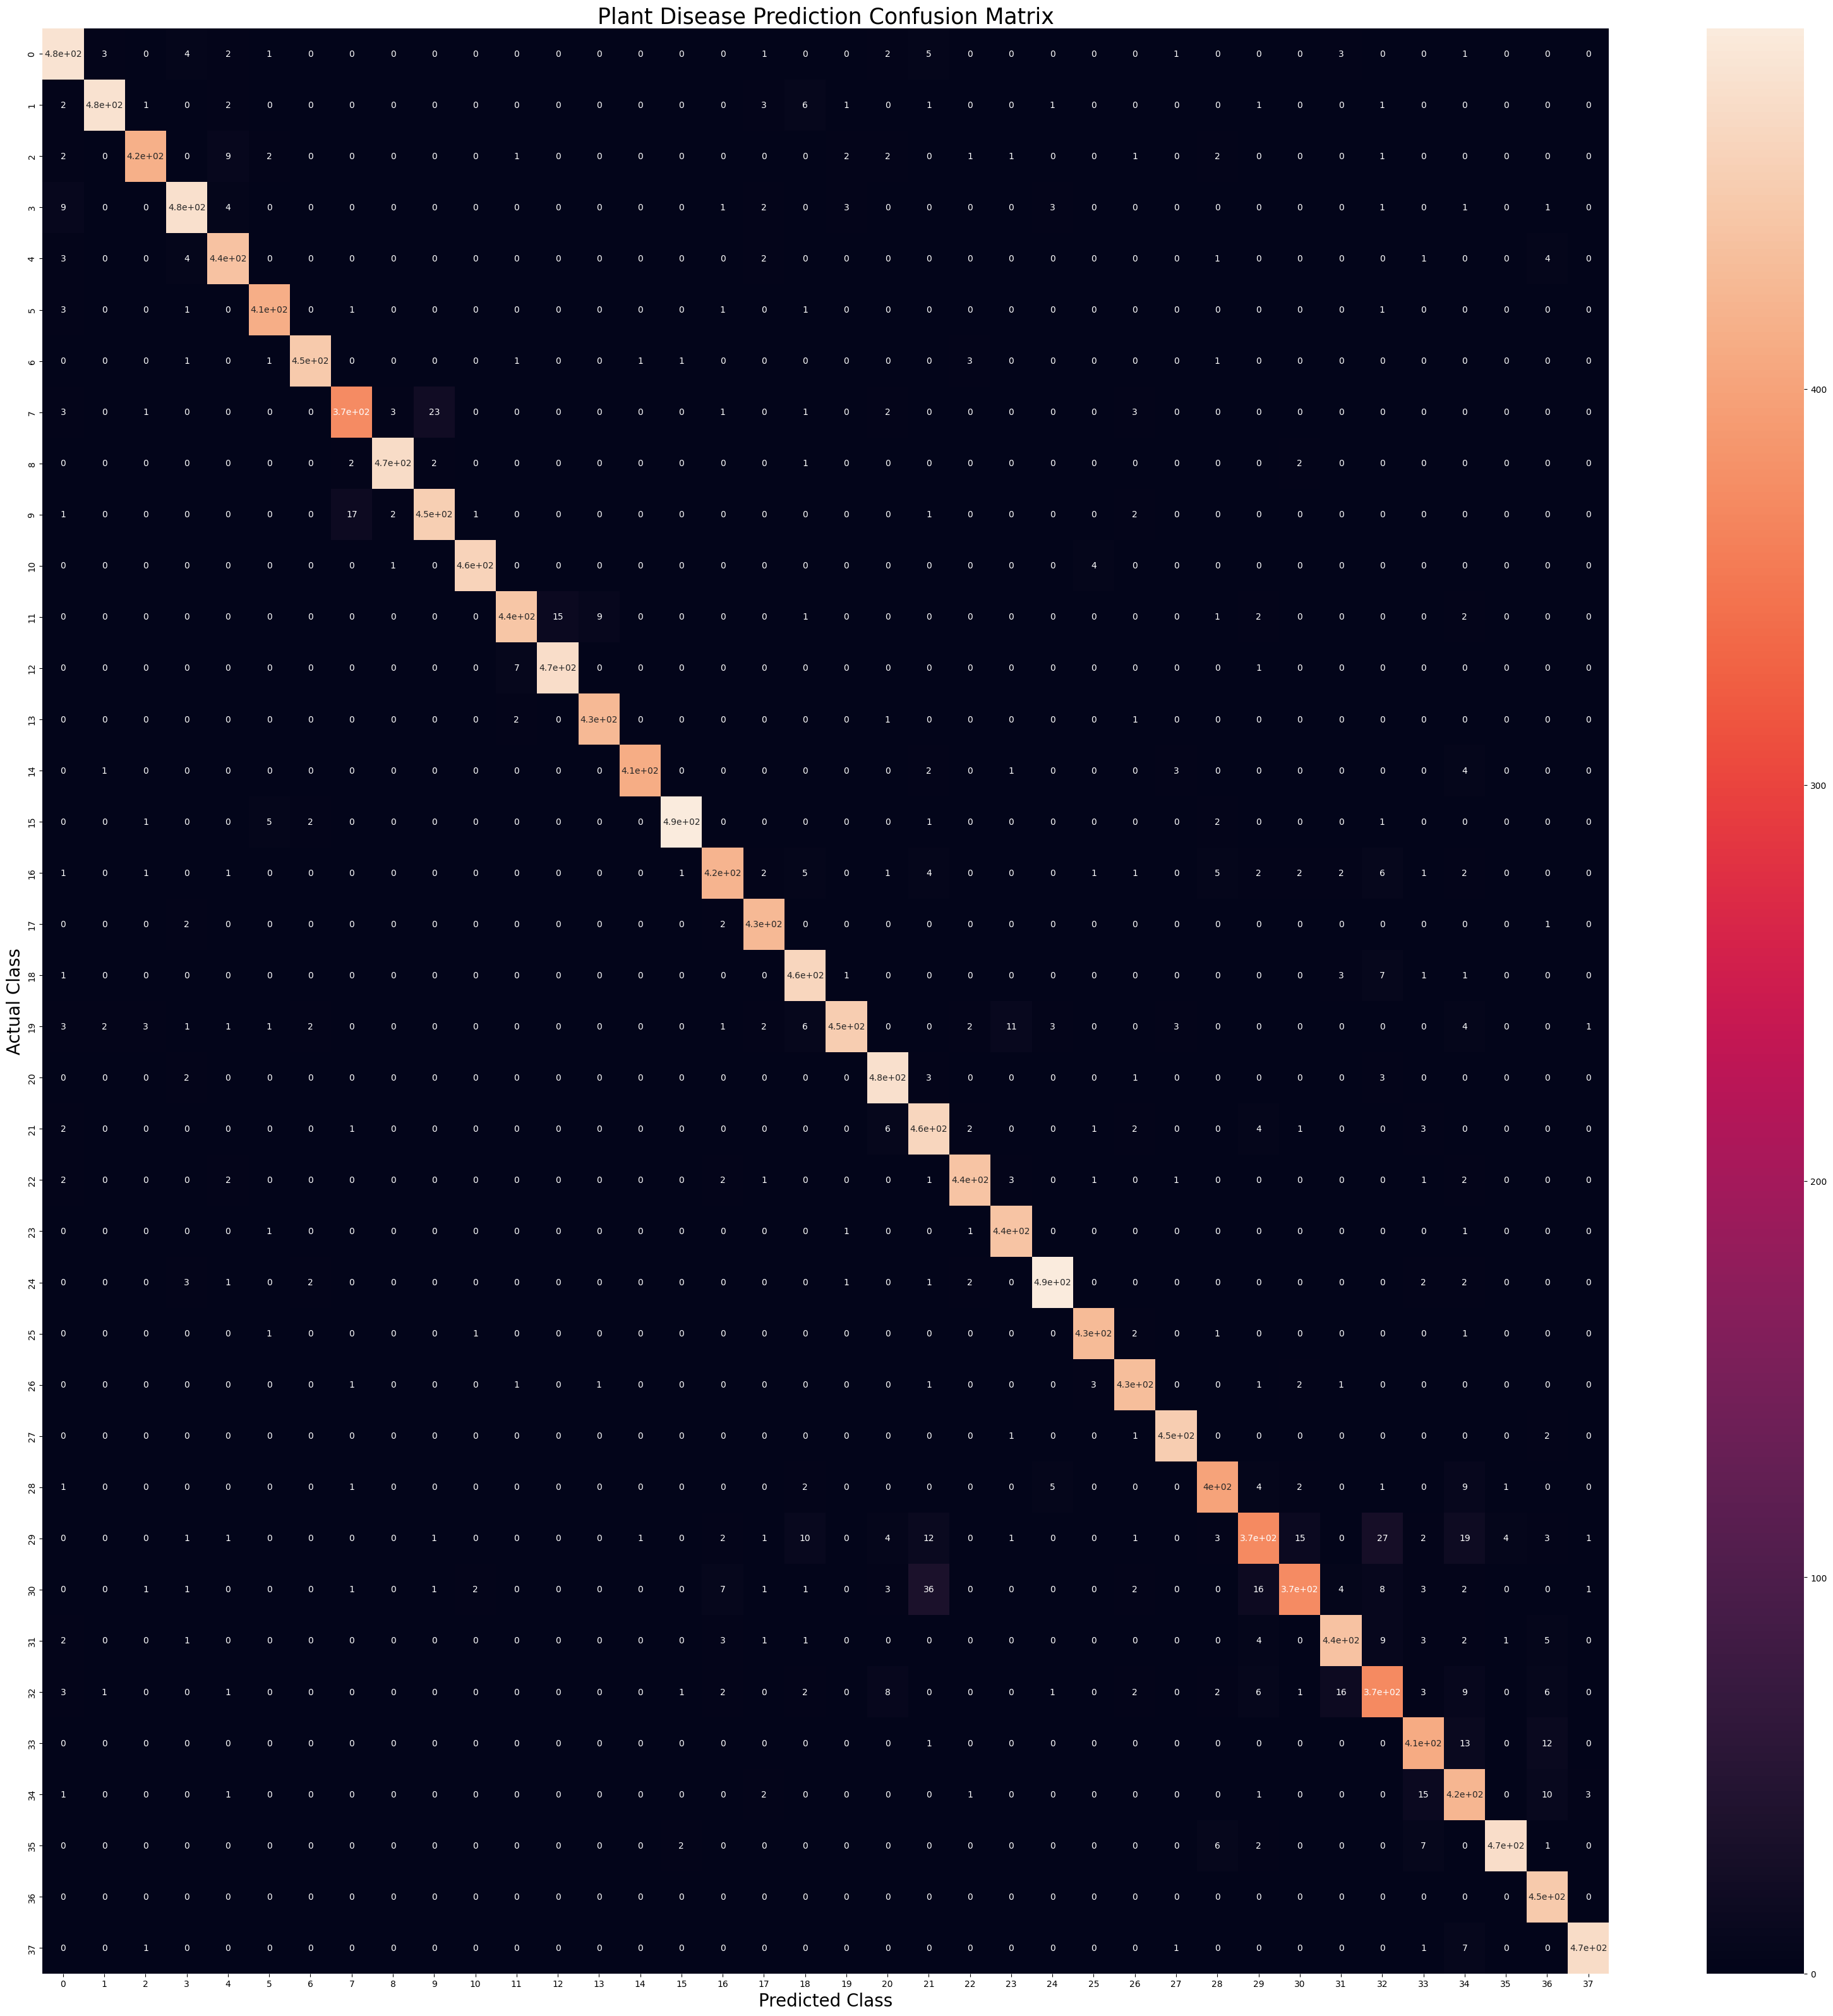

In [38]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})
plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [21]:
# Extract features using the CNN
def extract_features(model, dataset):
    features = []
    labels = []
    for images, lbls in dataset:
        extracted_features = model.predict(images)
        features.append(extracted_features)
        labels.append(lbls)
    return np.concatenate(features), np.concatenate(labels)

In [22]:
feature_extractor = tf.keras.Model(inputs=cnn.input, outputs=cnn.layers[-3].output)

In [23]:
# Extract features for the training and validation sets
X_train, y_train = extract_features(feature_extractor, training_set)
X_val, y_val = extract_features(feature_extractor, validation_set)

1/1 [==============================] - 0s 113ms/step


In [24]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
import joblib
joblib.dump(knn_classifier, 'knn_classifier.pkl')

['knn_classifier.pkl']